# LIBRARIES


In [1]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import json
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# INISIASI DATASET


In [2]:
# import
PREPROCESSED_DATASET_FILE_NAME = "preprocessed.csv"
PREPROCESSED_DATASET_FILE_PATH = f"outputs/{PREPROCESSED_DATASET_FILE_NAME}"
DATA_FRAME_PREPROCESSED_DATASET = pd.read_csv(PREPROCESSED_DATASET_FILE_PATH)
DATA_FRAME_PREPROCESSED_DATASET_LENGTH = len(DATA_FRAME_PREPROCESSED_DATASET)
print(f"preprocessed dataset: {DATA_FRAME_PREPROCESSED_DATASET_LENGTH} tweets")
display(DATA_FRAME_PREPROCESSED_DATASET.tail(1))

preprocessed dataset: 3239 tweets


,user_id,username,user_display_name,tweet_id,full_text,created_at,cleaned_text,after_slang_text,underscore_negation_text,swap_negation_text,final_negation_text,is_different,after_stopwords_text,after_stemming_text,preprocessed_text
3238,1689531424054104064,arnold_sptr33,Arnold Saputra,1831181867472867445,@meraaahputiiih Pemindahan ibu kota mengilhami...,Wed Sep 04 04:05:53 +0000 2024,pemindahan ibu kota mengilhami kita untuk menj...,pemindahan ibu kota mengilhami kita untuk menj...,pemindahan ibu kota mengilhami kita untuk menj...,pemindahan ibu kota mengilhami kita untuk menj...,pemindahan ibu kota mengilhami kita untuk menj...,False,pemindahan kota mengilhami menjaga keanekaraga...,pindah kota ilham jaga keanekaragaman hayati,pindah kota ilham jaga keanekaragaman hayati


# INISIASI LEKSIKON


In [3]:
# InSet
with open("./lexicons/lexicon_json_inset-neg.txt") as f:
  inset_neg = f.read()
with open("./lexicons/lexicon_json_inset-pos.txt") as f:
  inset_pos = f.read()

insetNeg = json.loads(inset_neg)
insetPos = json.loads(inset_pos)

# SENTIMENT LABELLING


InSet Lexicon


In [4]:
# inisiasi vader sentiment analyzer
sia_inset_neg = SentimentIntensityAnalyzer()
sia_inset_pos = SentimentIntensityAnalyzer()

# clear default lexicon
sia_inset_neg.lexicon.clear()
sia_inset_pos.lexicon.clear()

# assign InSet lexicon
sia_inset_neg.lexicon.update(insetNeg)
sia_inset_pos.lexicon.update(insetPos)

In [5]:
# polarity score
def get_inset_compound_score(text):
  inset_compound_score = sia_inset_neg.polarity_scores(text)["compound"] + sia_inset_pos.polarity_scores(text)["compound"]
  return inset_compound_score

DATA_FRAME_PREPROCESSED_DATASET["compound_score"] = DATA_FRAME_PREPROCESSED_DATASET["preprocessed_text"].apply(get_inset_compound_score)
display(DATA_FRAME_PREPROCESSED_DATASET.tail(1))

,user_id,username,user_display_name,tweet_id,full_text,created_at,cleaned_text,after_slang_text,underscore_negation_text,swap_negation_text,final_negation_text,is_different,after_stopwords_text,after_stemming_text,preprocessed_text,compound_score
3238,1689531424054104064,arnold_sptr33,Arnold Saputra,1831181867472867445,@meraaahputiiih Pemindahan ibu kota mengilhami...,Wed Sep 04 04:05:53 +0000 2024,pemindahan ibu kota mengilhami kita untuk menj...,pemindahan ibu kota mengilhami kita untuk menj...,pemindahan ibu kota mengilhami kita untuk menj...,pemindahan ibu kota mengilhami kita untuk menj...,pemindahan ibu kota mengilhami kita untuk menj...,False,pemindahan kota mengilhami menjaga keanekaraga...,pindah kota ilham jaga keanekaragaman hayati,pindah kota ilham jaga keanekaragaman hayati,-0.2626


In [6]:
# labelling
def get_inset_label(number):
  if number < 0:
    return "negatif"
  elif number == 0:
    return "netral"
  elif number > 0:
    return "positif"
  else:
    return

DATA_FRAME_PREPROCESSED_DATASET["sentiment_label"] = DATA_FRAME_PREPROCESSED_DATASET["compound_score"].apply(get_inset_label)
display(DATA_FRAME_PREPROCESSED_DATASET.tail(1))

,user_id,username,user_display_name,tweet_id,full_text,created_at,cleaned_text,after_slang_text,underscore_negation_text,swap_negation_text,final_negation_text,is_different,after_stopwords_text,after_stemming_text,preprocessed_text,compound_score,sentiment_label
3238,1689531424054104064,arnold_sptr33,Arnold Saputra,1831181867472867445,@meraaahputiiih Pemindahan ibu kota mengilhami...,Wed Sep 04 04:05:53 +0000 2024,pemindahan ibu kota mengilhami kita untuk menj...,pemindahan ibu kota mengilhami kita untuk menj...,pemindahan ibu kota mengilhami kita untuk menj...,pemindahan ibu kota mengilhami kita untuk menj...,pemindahan ibu kota mengilhami kita untuk menj...,False,pemindahan kota mengilhami menjaga keanekaraga...,pindah kota ilham jaga keanekaragaman hayati,pindah kota ilham jaga keanekaragaman hayati,-0.2626,negatif


# EXPORT


In [7]:
DATA_FRAME_PREPROCESSED_DATASET.to_csv("outputs/sentiment.csv", index=False)

# PIE CHART InSet


sentiment_label
negatif    1986
positif     909
netral      344
Name: count, dtype: int64


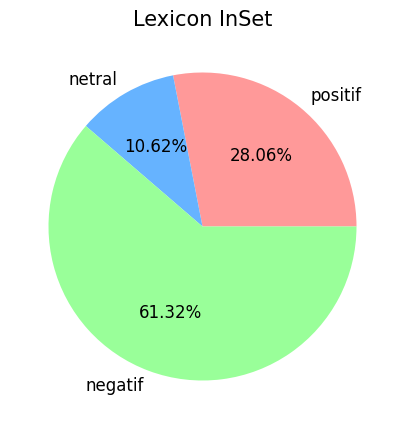

In [8]:
# InSet
inset_label	= DATA_FRAME_PREPROCESSED_DATASET["sentiment_label"]
inset_label_counts = inset_label.value_counts()
print(inset_label_counts)

positif_inset_perc = inset_label_counts.positif / inset_label_counts.sum() * 100
netral_inset_perc = inset_label_counts.netral / inset_label_counts.sum() * 100
negatif_inset_perc = inset_label_counts.negatif / inset_label_counts.sum() * 100

labels = 'positif', 'netral', 'negatif'
sizes = [positif_inset_perc, netral_inset_perc, negatif_inset_perc]
colors = ['#ff9999','#66b3ff','#99ff99']
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
ax.pie(sizes, labels = labels, autopct='%.2f%%', colors=colors, textprops={'fontsize': 12})
ax.set_title('Lexicon InSet', fontsize=15)
plt.show()